In [3]:
import re
import cv2
import pytesseract
from PIL import Image
import os
import matplotlib.pyplot as plt

CWD_PATH = os.getcwd()
PATH_FACE_XML = os.path.join(CWD_PATH, 'model/haarcascade_frontalface_alt.xml')
PATH_EYE_XML = os.path.join(CWD_PATH, 'model/haarcascade_frontalface_alt.xml')

TEST_IMAGE_PATH = os.path.join(CWD_PATH, 'test_images')
classfier = cv2.CascadeClassifier(PATH_FACE_XML)
eyes_cascade = cv2.CascadeClassifier(PATH_EYE_XML)


In [31]:
def detectAndDisplay(frame):
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)
    #-- Detect faces
    faces = classfier.detectMultiScale(frame_gray,scaleFactor=1.2, minNeighbors=3, minSize=(48, 48))
    print('len - ', len(faces))
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv2.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame[y:y+h,x:x+w]
        plt.imshow(faceROI)
        #-- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv2.circle(frame, eye_center, radius, (255, 0, 0 ), 4)
    plt.imshow(frame)

len -  1


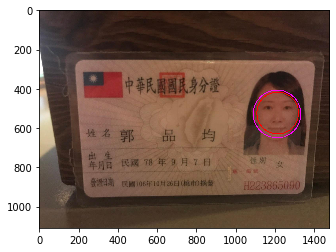

In [32]:
pic_path = os.path.join(TEST_IMAGE_PATH, '001460.jpeg')
frame = plt.imread(pic_path)
detectAndDisplay(frame)